# Are stock returns normally distributed ?

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import scipy.stats as stats
import pandas_datareader as pdr
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

### Get stock market data

In [2]:
end = dt.datetime.now()
start = dt.datetime(2000, 1, 1)

df = pdr.get_data_yahoo('^GSPC', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


### Calculate Daily Simple Returns

The product of normally distributed variables ISN'T normally distributed ---> SIMPLE returns. 

The sum of normally distributed variables IS normally distributed ---> LOG returns.

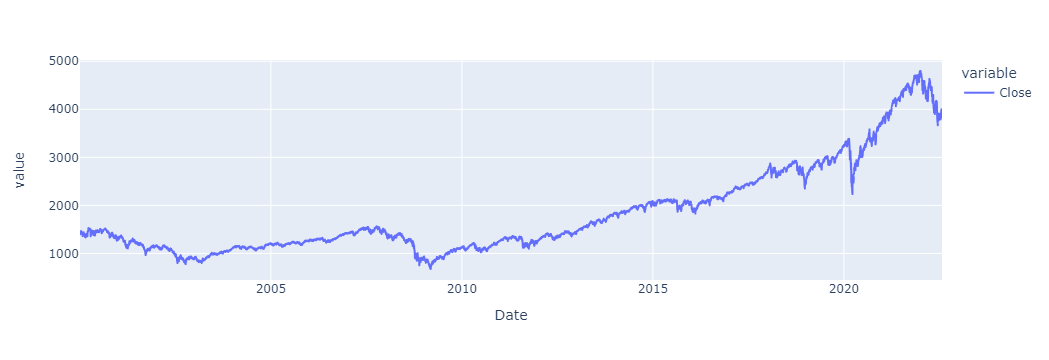

In [3]:
df.Close.plot()

In [4]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 1455.219970703125 Last 3964.340087890625


In [18]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2022-07-21    0.009861
2022-07-22   -0.009332
2022-07-25    0.001315
2022-07-26   -0.011543
2022-07-27    0.011040
Name: Close, Length: 5677, dtype: float64

In [6]:
df.Close[0] * np.prod([(1 + Rt) for Rt in simple_returns])

3964.3400878905973

In [7]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns

Date
2000-01-04   -0.039099
2000-01-05    0.001920
2000-01-06    0.000955
2000-01-07    0.026730
2000-01-10    0.011128
                ...   
2022-07-21    0.009813
2022-07-22   -0.009376
2022-07-25    0.001314
2022-07-26   -0.011610
2022-07-27    0.010980
Name: Close, Length: 5677, dtype: float64

In [8]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

3964.3400878906086

## Histogram of log returns

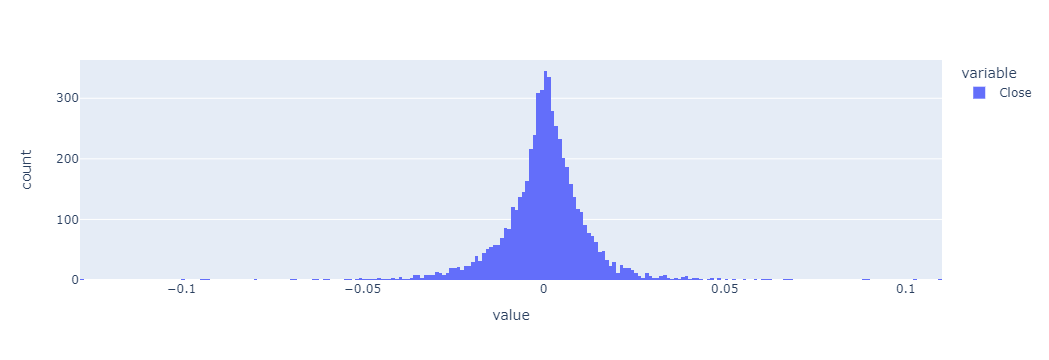

In [9]:
log_returns.plot(kind='hist')

### Is normality a good assumption for normal data ?

In [10]:
log_returns_sorted = log_returns.to_list()
log_returns_sorted.sort()

worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

standardized_worst = (worst - log_returns.mean()) / log_returns.std()
standardized_best = (best - log_returns.mean()) / log_returns.std()

In [11]:
print('Standard deviation: worst =', round(standardized_worst, 2), ', best =', round(standardized_best, 2))
print('Probability: worst =', stats.norm(0, 1).pdf(standardized_worst), ', best =', stats.norm(0, 1).pdf(standardized_best))

Standard deviation: worst = -10.25 , best = 8.77
Probability: worst = 6.2865121536931006e-24 , best = 7.954708827383566e-18


## Testing for Normality

### Quantile-Quantile Plots

In statistics, a Q–Q plot (quantile-quantile plot) is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the identity line y = x. 

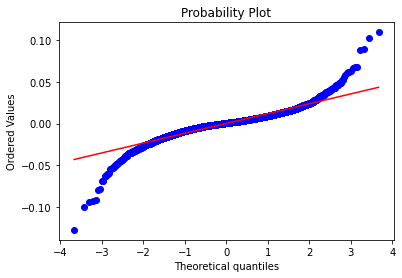

In [12]:
stats.probplot(log_returns, dist='norm', plot=pylab);

### Boxplots

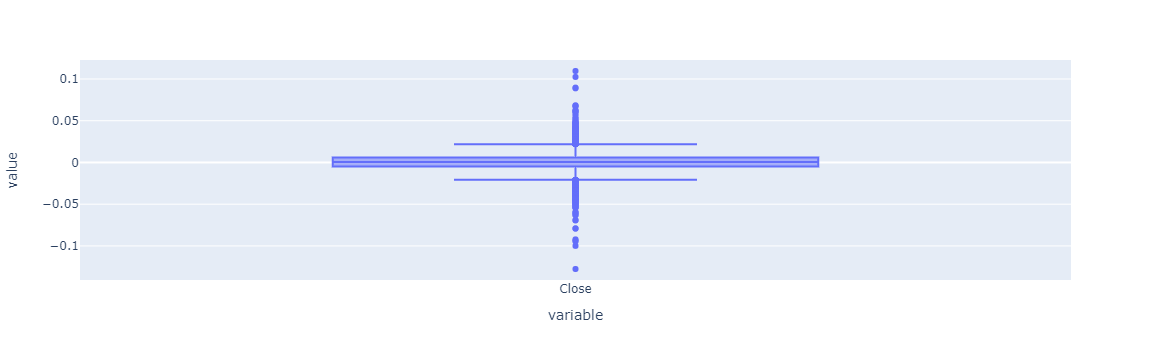

In [13]:
log_returns.plot(kind='box')

## Hypothesis Testing

### Kolmogorov Smirnov Test

The test answers the question "What is the probability that this collection of samples could have been drawn from that probability distribution?". The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). 

In [14]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print('ks statistic:', ks_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

ks statistic: 0.47843320041384363 , p value: 0.0
Probably NOT Gaussian


### Shapiro Wilk Test

The Shapiro–Wilk test is a test of normality in frequentist statistics. 

In [15]:
sw_stat, p_value = stats.shapiro(log_returns)
print('sw statistic:', sw_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

sw statistic: 0.896064043045044 , p value: 0.0
Probably NOT Gaussian


C:\Users\bergi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.

